In [1]:
%%capture
## compile PyRoss for this notebook
import os
owd = os.getcwd()
os.chdir('../../')
%run setup.py install
os.chdir(owd)

In [2]:
%matplotlib inline
import numpy as np
import pyross
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [3]:
## population and age classes
M=16  ## number of age classes

my_data = np.genfromtxt('../data/age_structures/Denmark-2019.csv', delimiter=',', skip_header=1)
aM, aF = my_data[:, 1], my_data[:, 2]

Ni=aM+aF;   Ni=Ni[0:M];  N=np.sum(Ni)

In [4]:
# Get individual contact matrices
CH, CW, CS, CO = pyross.contactMatrix.Denmark()

In [5]:
# Generate class with contact matrix for SIR model with UK contact structure
generator = pyross.contactMatrix.ContactMatrixFunction(CH, CW, CS, CO)

contactMatrix = generator.constant_contactMatrix()

## SIR

In [6]:
beta  = 0.01896278      # contact rate parameter
gIa   = 1./7            # removal rate of asymptomatic infectives 
gIs   = 1./7            # removal rate of symptomatic infectives 
alpha = 0.              # asymptomatic fraction
fsa   = 1               # suppresion of contact by symptomatics


# initial conditions    
Is_0 = np.zeros((M));  Is_0[0:2]=5; Is_0[2:4]=15; Is_0[4:8]=67;  Is_0[8:10]=126; Is_0[10:12]=80
Ia_0 = np.zeros((M));  Ia_0[4:8]=0; Ia_0[8:11]=0
R_0  = np.zeros((M))
S_0  = Ni - (Ia_0 + Is_0 + R_0)


parameters = {'alpha':alpha,'beta':beta, 'gIa':gIa, 'gIs':gIs,'fsa':fsa}
model = pyross.deterministic.SIR(parameters, M, Ni)


# start simulation
Tf=54;  Nf=700 
data=model.simulate(S_0, Ia_0, Is_0, contactMatrix, Tf, Nf)

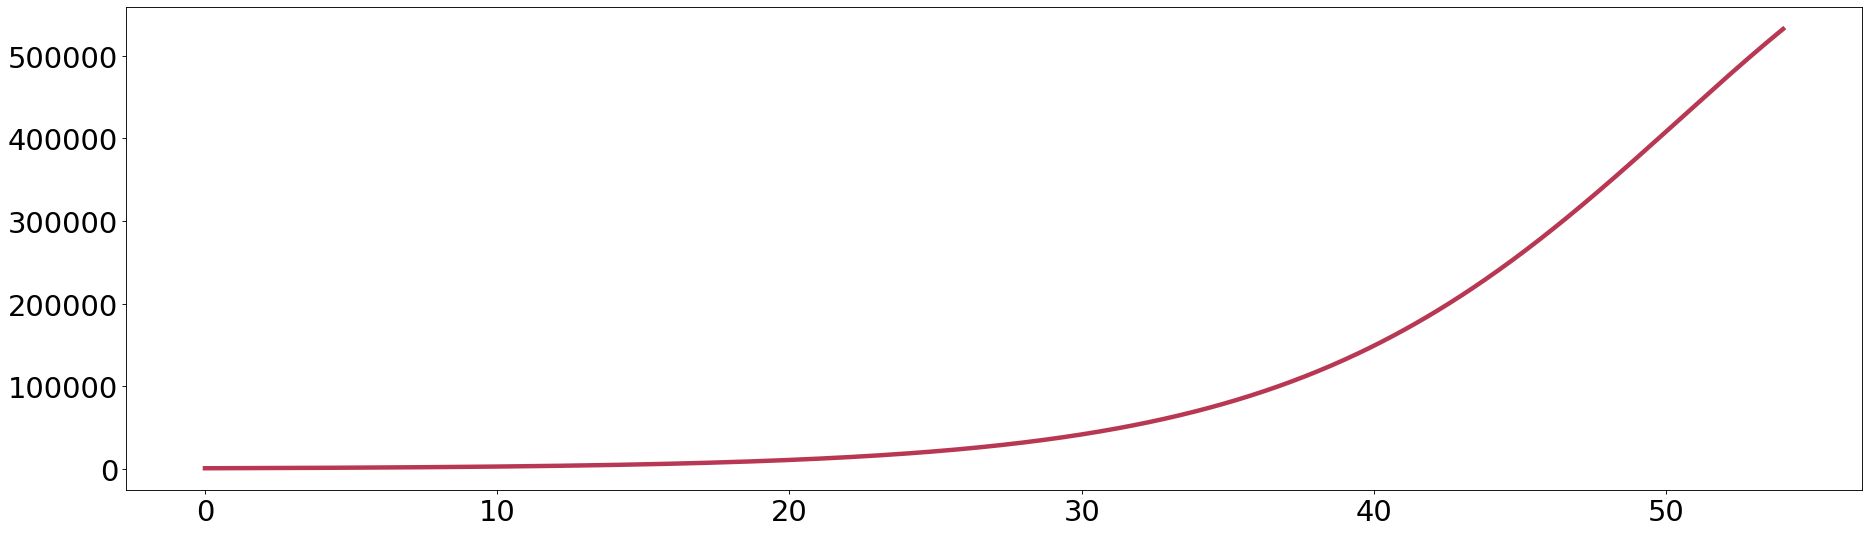

In [7]:
t = data['t']; 
Is = model.Is(data)
agedSummedIs = Is.sum(axis=1)

plt.rcParams.update({'font.size': 26})
fig = plt.figure(num=None, figsize=(28, 8), dpi=80, facecolor='w', edgecolor='k')

plt.plot(t, agedSummedIs, '-', lw=4, color='#A60628', label='forecast', alpha=0.8)

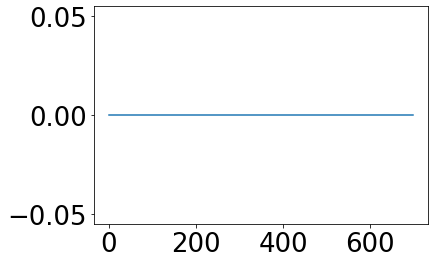

In [8]:
S  = model.S(data)
Is = model.Is(data)
Ia = model.Ia(data)
R  = model.R(data)
plt.plot( (S+Ia+Is+R).sum(axis=1) - N );

## SIRS

In [9]:
beta  = 0.036692            # infection rate 

gIa   = 1./7                # removal rate of asymptomatic infectives 
gIs   = 1./7                # removal rate of symptomatic infectives 

alpha = 0.3                 # fraction of asymptomatic infectives 
fsa   = 0.2                   # the self-isolation parameter   

sa    = 100*np.ones(M)      # arrival of new susceptibles
sa[0] = 1500

iaa   = 10*np.ones(M)       # daily arrival of new  asymptomatics
ep    = 0.01                # fraction of removed who is susceptible



# initial conditions    
Is_0 = np.zeros((M));  Is_0[6:13]=8;  Is_0[2:6]=4; Is_0[13:16]=4

Ia_0 = np.zeros((M));  Ia_0[6:13]=4;  Ia_0[2:6]=2; Ia_0[13:16]=2
R_0  = np.zeros((M))
S_0  = Ni - (Ia_0 + Is_0 + R_0)

parameters = {'alpha':alpha,'beta':beta, 'gIa':gIa,'gIs':gIs,'fsa':fsa, 'sa':sa, 'iaa':iaa, 'ep':ep}
model = pyross.deterministic.SIRS(parameters, M, Ni)
data=model.simulate(S_0, Ia_0, Is_0, contactMatrix, Tf, Nf)

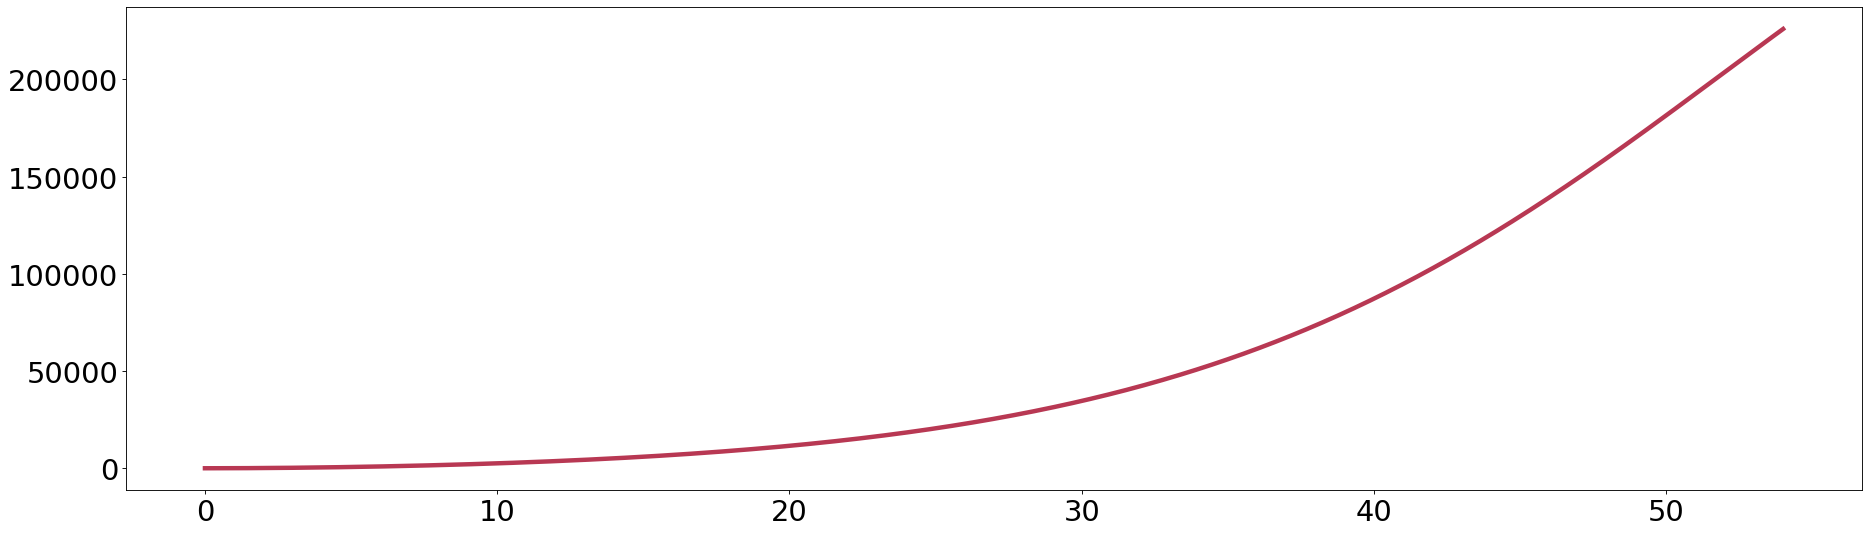

In [10]:
t = data['t']; 
Is = model.Is(data)
agedSummedIs = Is.sum(axis=1)

plt.rcParams.update({'font.size': 26})
fig = plt.figure(num=None, figsize=(28, 8), dpi=80, facecolor='w', edgecolor='k')

plt.plot(t, agedSummedIs, '-', lw=4, color='#A60628', label='forecast', alpha=0.8)

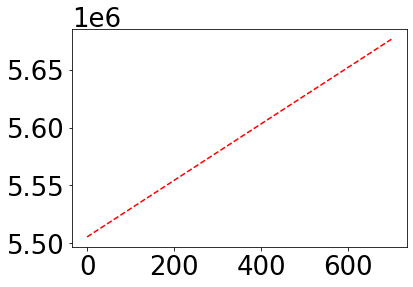

In [11]:
population  = model.population(data)
plt.plot( population.sum(axis=1), 'r--' );

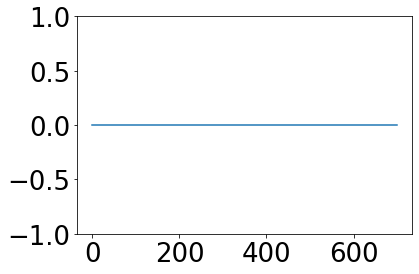

In [12]:
S  = model.S(data)
Is = model.Is(data)
Ia = model.Ia(data)
R  = model.R(data)

Rtest = population - S - Is - Ia

plt.plot( (R-Rtest).sum(axis=1) );
plt.ylim(-1,1);

## SEIR

In [13]:
beta  = 0.01896278      # contact rate parameter
gIa   = 1./7            # removal rate of asymptomatic infectives 
gIs   = 1./7            # removal rate of symptomatic infectives 
gE    = 1/4             # rate to go from E to I
alpha = 0.              # asymptomatic fraction
fsa   = 1               # suppresion of contact by symptomatics


# initial conditions    
Is_0 = np.zeros((M));  Is_0[0:2]=5; Is_0[2:4]=15; 
Ia_0 = np.zeros((M));  Ia_0[4:8]=0; Ia_0[8:11]=0
E_0 = np.zeros((M));  E_0[2:14]=2
R_0  = np.zeros((M))
S_0  = Ni - (Ia_0 + Is_0 + R_0)


parameters = {'alpha':alpha,'beta':beta, 'gIa':gIa, 'gE':gE, 'gIa':gIa,'gIs':gIs,'fsa':fsa}
model = pyross.deterministic.SEIR(parameters, M, Ni)


# start simulation
Tf=54;  Nf=700 
data=model.simulate(S_0, E_0, Ia_0, Is_0, contactMatrix, Tf, Nf)

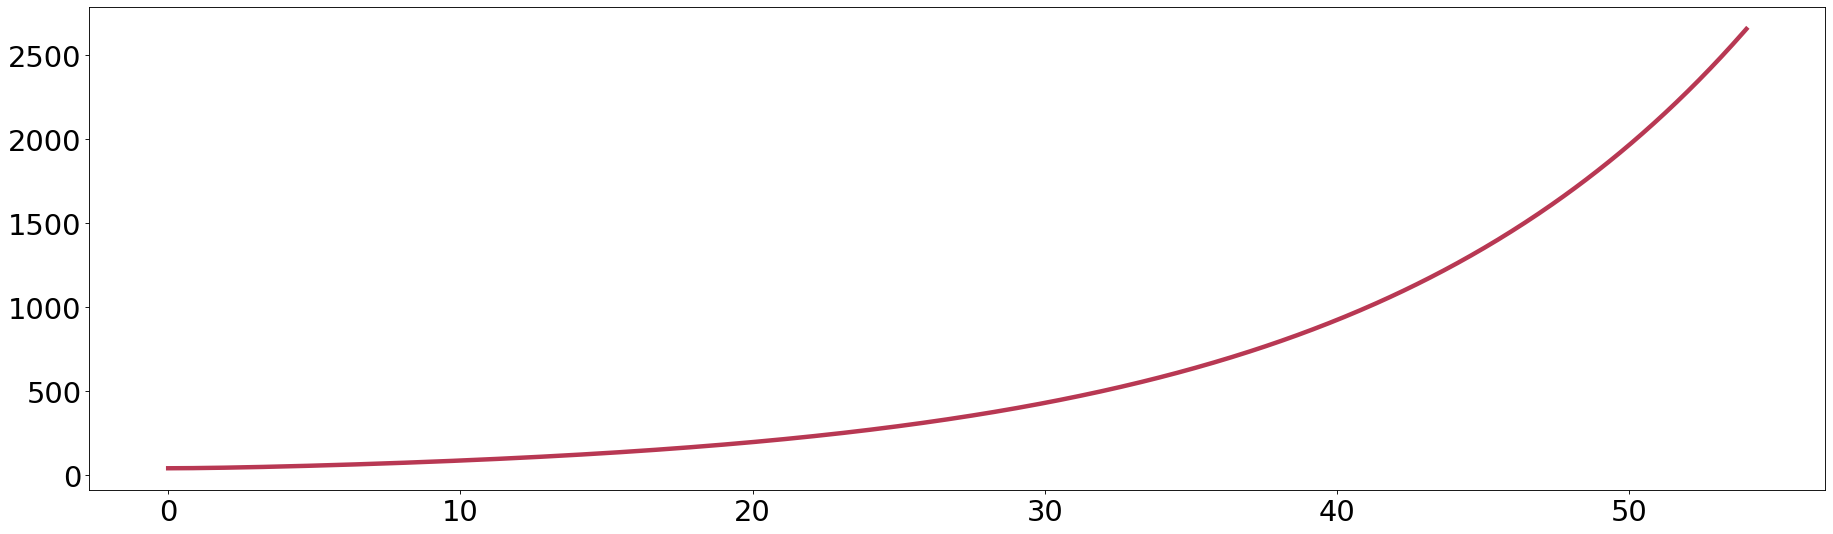

In [14]:
t = data['t']; 
Is = model.Is(data)
agedSummedIs = Is.sum(axis=1)

plt.rcParams.update({'font.size': 26})
fig = plt.figure(num=None, figsize=(28, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(t, agedSummedIs, '-', lw=4, color='#A60628', label='forecast', alpha=0.8);

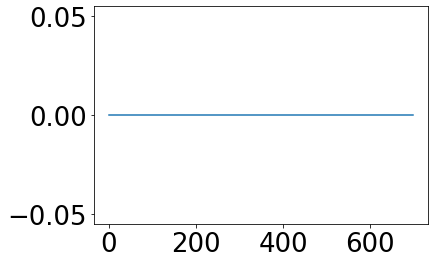

In [15]:
S  = model.S(data)
E  = model.E(data)
Is = model.Is(data)
Ia = model.Ia(data)
R  = model.R(data)
plt.plot( (S+E+Ia+Is+R).sum(axis=1) - N );

## SEAI8R

Here $N_i$ is the alive population, such that

$R_i = N_i(t) - (S_i + E_i + A_i + I^a_i + I^s_i + I^h_i + I^c_i + I^{s'}_i + I^{h'}_i + I^{c'}_i)$

In [16]:
beta  = 0.036692            # infection rate 

gE    = 1/5
gA    = 1/3
gIa   = 1./7                # removal rate of asymptomatic infectives 
gIs   = 1./7                # removal rate of symptomatic infectives 
alpha = 0.3                 # fraction of asymptomatic infectives 
fsa   = 0.2                 # the self-isolation parameter   
fh    = 0
gIh   = 1/14
gIc   = 1/14
 
gIsp  = 1/7
gIhp  = 1/7
gIcp  = 1/7


sa    = 100*np.ones(M)      #  rate of additional/removal of population by birth etc
sa[0]     = 1500            # birth
sa[12:16] = -300            # mortality


hh   = 0.1*np.ones(M)       # fraction which goes from Is to hospital
cc   = 0.05*np.ones(M)      # fraction which goes from  hospital to ICU 
mm   = 0.4*np.ones(M)       # mortality from IC



# initial conditions    
Is_0 = np.zeros((M));  #Is_0[6:13]=8;  Is_0[2:6]=4; Is_0[13:16]=4


Ia_0 = 1000*np.ones((M));  
R_0  = np.zeros((M))
E_0  = np.zeros((M))
A_0  = np.zeros((M))
Ih_0  = np.zeros((M))
Ihp_0  = np.zeros((M))
Ic_0  = np.zeros((M))
Im_0  = np.zeros((M))
Ic_0  = np.zeros((M))
Icp_0  = np.zeros((M))
Isp_0  = np.zeros((M))
Im_0  = np.zeros((M))

S_0  = Ni - (E_0 + A_0 + Ia_0 + Is_0 + Isp_0+ Icp_0+ Ihp_0 + Ih_0 + Ic_0  + R_0)

# intantiate model
parameters = {'alpha':alpha,'beta':beta, 'gIa':gIa,'gIs':gIs,
              'gIh':gIh,'gIc':gIc,  'gE':gE, 'gA':gA,
              'fsa':fsa, 'fh':fh, 'gIsp':gIsp, 'gIcp':gIcp, 'gIhp':gIhp,
              'sa':sa, 'hh':hh, 'cc':cc, 'mm':mm}
model = pyross.deterministic.SEAI8R(parameters, M, Ni)

# start simulation
Tf=154;  Nf=700 
data  = model.simulate(S_0, E_0, A_0, Ia_0, Is_0, Isp_0, Ih_0, 
                       Ih_0, Ic_0, Icp_0, Im_0, contactMatrix, Tf, Nf)

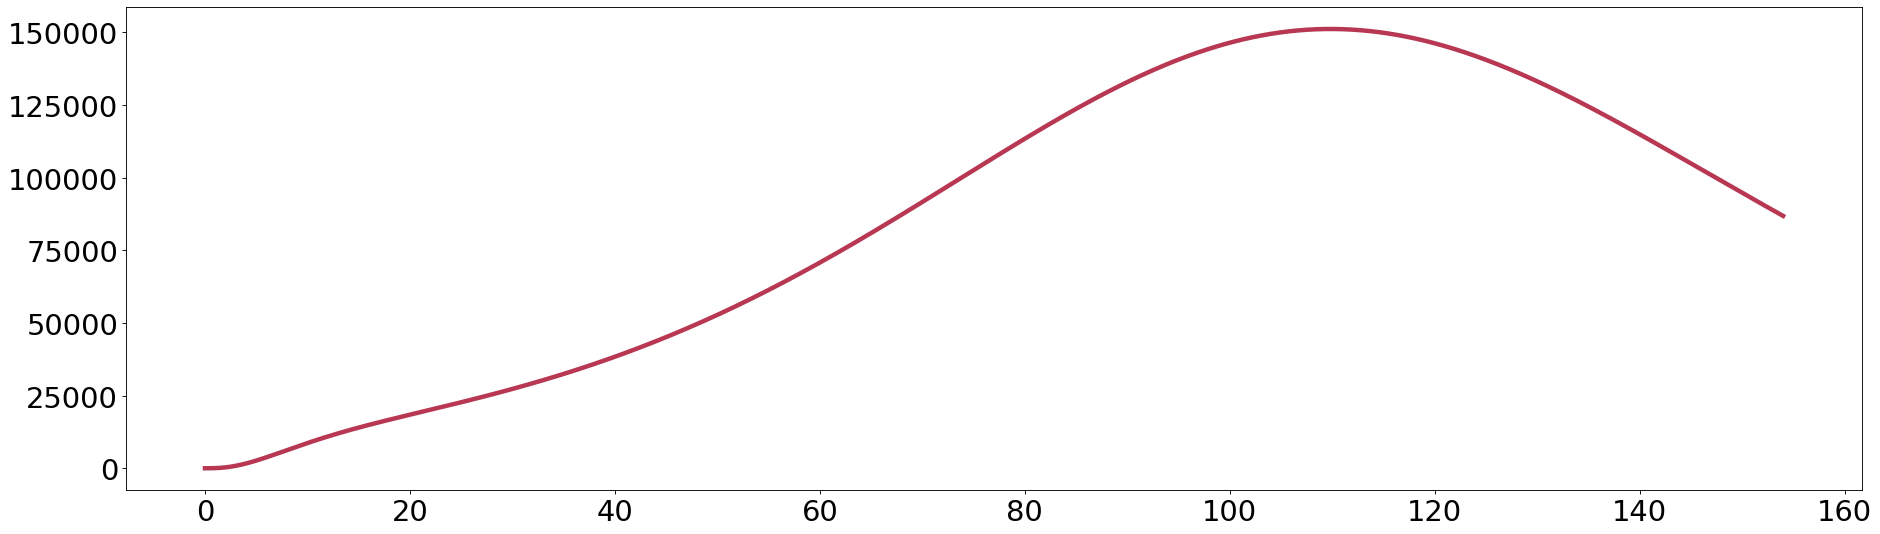

In [17]:
t = data['t']; 
Is = model.Is(data)
agedSummedIs = Is.sum(axis=1)

plt.rcParams.update({'font.size': 26})
fig = plt.figure(num=None, figsize=(28, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(t, agedSummedIs, '-', lw=4, color='#A60628', label='forecast', alpha=0.8);

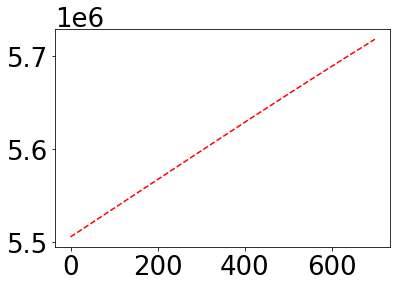

In [18]:
population  = model.population 
plt.plot( population.sum(axis=1), 'r--' );

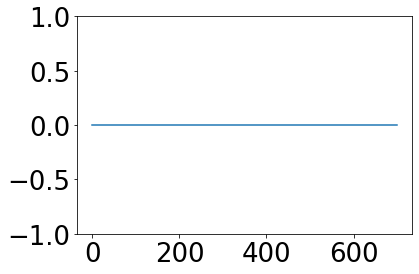

In [19]:
R = population*0
X = data['X']
for i in range(10):
    R += X[:, i*M:(i+1)*M]

R = X[:, 11*M:(12)*M] - R

Rtest =  model.R(data)


plt.plot( (R-Rtest).sum(axis=1) );
plt.ylim(-1,1);

### SEAIR model using Spp

We use Spp to construct SEAIR and read the data

In [20]:
model_spec = {
    "classes" : ["S", "E", "A", "Ia", "Is"],

    "S" : {
        "linear"    : [],
        "infection" : [ ["A", "-beta"], ["Ia", "-beta"], ["Is", "-beta"] ]
    },

    "E" : {
        "linear"    : [ ["E", "-gammaE"] ],
        "infection" : [ ["A", "beta"], ["Ia", "beta"], ["Is", "beta"] ]
    },
    
    "A" : {
        "linear"    : [ ["E", "gammaE"], ["A", "-alphabar*gammaA"], ["A", "-alpha*gammaA"] ],
        "infection" : [ ]
    },

    "Ia" : {
        "linear"    : [ ["A", "alpha*gammaA"],["Ia", "-gammaIa"] ],
        "infection" : [ ]
    },
    
    "Is" : {
        "linear"    : [ ["A", "alphabar*gammaA"], ["Is", "-gammaIs"] ],
        "infection" : [ ]
    }
}

gammaA = 0.2
alpha = 0.4              # fraction of asymptomatic infectives

parameters = {
    'beta' : 0.2,
    'gammaE' : 0.04,
    'alpha*gammaA' : alpha*gammaA,
    'alphabar*gammaA' : (1 - alpha)*gammaA,
    'gammaIa' : 0.1,
    'gammaIs' : [0.1,0.1, 0.1],
}

This corresponds to

$$
\begin{aligned}
\dot{S}_i & = - \lambda_i(t) S_i  \\
\dot{E}_i & = \lambda_i(t) S_i - \gamma_E E_i \\
\dot{A}_i & = \gamma_E E_i - \gamma_A A_i \\
\dot{I^a}_i & =  \alpha \gamma_A A  - \gamma_I^a I^a_i \\
\dot{I^s}_i & =  (1 - \alpha)\gamma_A A  - \gamma_I^s I^s_i \\
\dot{R}_i & = \gamma_I^a I^a_i + \gamma_I^s I^s_i
\end{aligned}
$$

where

$$
\lambda_i(t) = \sum_j C_{ij} \left( \beta_I^a  \frac{I^a_j}{N_j} + \beta_I^s  \frac{I^s_j}{N_j} + \beta_A  \frac{A_j}{N_j}\right).
$$


$$
C_{ij}  \beta_I^a  \frac{I^a_j}{N_j}
$$

In [21]:
M = 3                
Ni = 10000*np.ones(M)   
N = np.sum(Ni) 

E0 = np.array([0,0,0])
A0 = np.array([1,0,0])
Ia0 = np.array([0,0,0])
Is0 =  np.array([0,0,0])
S0 = Ni - np.array([1,0,0])

x0 = {
    'E' : E0,
    'A' : A0,
    'Ia' : Ia0,
    'Is' : Is0,
    'S' : S0
}

CM = np.array([
    [1,   0.5, 0.1],
    [0.5, 1,   0.5],
    [0.1, 0.5, 1  ]
], dtype=float)

def contactMatrix(t):   
    return CM

# duration of simulation and data file
Tf = 300;  Nt=161; Nf=Nt; 

model = pyross.deterministic.Spp(model_spec, parameters, M, Ni)

# simulate model 
data = model.simulate(x0, contactMatrix, Tf, Nt)


# create an idential hardcoded SEAIR model 
parameters_for_hardcoded_model = {
    'alpha' : alpha, 
    'beta' : 0.2,
    'gE' : 0.04,
    'gA' : gammaA,
    'gIa' : 0.1,
    'gIs' : 0.1,
    'fsa' : 1
}
model_hardcoded = pyross.deterministic.SEAIR(parameters_for_hardcoded_model, M, Ni)

# simulate model 
data_hardcoded = model_hardcoded.simulate(S0, E0, A0, Ia0, Is0, contactMatrix, Tf, Nt)

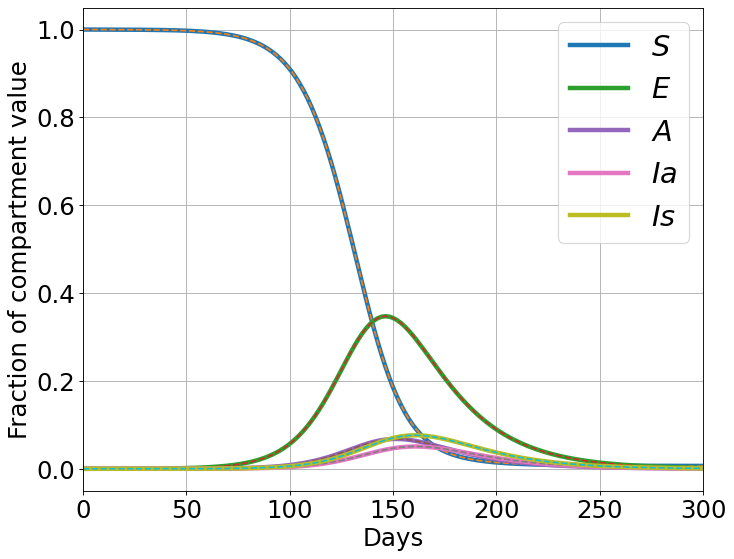

In [22]:
# plot the data and obtain the epidemic curve

t = data['t']

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

X_hardcoded = data_hardcoded['X'].reshape((Nf, 5, M))

for i, model_class in enumerate(model_spec['classes']):
    Os = np.sum(model.model_class_data(model_class, data), axis=1)
    plt.plot(t, Os/N, '-', label='$%s$' % model_class, lw=4)
    plt.plot(t, np.sum(X_hardcoded[:, i, :], axis=1)/N, '--')

plt.legend(fontsize=26); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Fraction of compartment value')
plt.xlabel('Days');